In [51]:
import pandas as pd
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

## 1. Load Dataset

In [52]:
DATAPATH = "Data/loan_data.csv"

df = pd.read_csv(DATAPATH)
df.columns

Index(['customer_id', 'age', 'gender', 'income', 'employment_type',
       'credit_score', 'loan_amount', 'loan_term', 'num_delinquencies',
       'default'],
      dtype='object')

The dataset contains customer information regarding their background and financial information including their credit score and associated loans. 

Default (binary 0 vs 1) where 1 = failed to pay loan when it is due, 0 = paid interest.

In [53]:
#generate monthly dates 
np.random.seed(10)
date_range = pd.date_range(start="2015-01-01", end="2025-12-31", freq='MS')
df['loan_issue_date'] = np.random.choice(date_range, size=len(df))
df['month'] = df['loan_issue_date'].dt.to_period('M') #convert to monthly period

In [54]:
df

,customer_id,age,gender,income,employment_type,credit_score,loan_amount,loan_term,num_delinquencies,default,loan_issue_date,month
0,C00001,59,Female,37880,Self-employed,624,18486,60,0,0,2015-10-01,2015-10
1,C00002,49,Female,22965,Self-employed,618,4142,60,0,0,2025-06-01,2025-06
2,C00003,35,Female,51856,Salaried,770,9660,60,2,0,2016-04-01,2016-04
3,C00004,63,Male,51565,Salaried,619,19513,36,2,0,2020-05-01,2020-05
4,C00005,28,Male,44771,Unemployed,660,20154,24,0,0,2024-06-01,2024-06
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,C09996,29,Male,58641,Salaried,712,15500,36,0,0,2016-03-01,2016-03
9996,C09997,37,Male,40758,Salaried,783,7690,36,2,0,2019-11-01,2019-11
9997,C09998,56,Male,78882,Self-employed,749,16465,36,0,0,2016-12-01,2016-12
9998,C09999,37,Female,60081,Unemployed,658,4920,36,1,0,2016-12-01,2016-12


In [55]:
df.dtypes

customer_id                  object
age                           int64
gender                       object
income                        int64
employment_type              object
credit_score                  int64
loan_amount                   int64
loan_term                     int64
num_delinquencies             int64
default                       int64
loan_issue_date      datetime64[ns]
month                     period[M]
dtype: object

In [56]:
df.columns

Index(['customer_id', 'age', 'gender', 'income', 'employment_type',
       'credit_score', 'loan_amount', 'loan_term', 'num_delinquencies',
       'default', 'loan_issue_date', 'month'],
      dtype='object')

#### Glimps at data

In [57]:
df['gender'].value_counts()

gender
Female    5005
Male      4995
Name: count, dtype: int64

In [58]:
df['employment_type'].value_counts()

employment_type
Salaried         5956
Self-employed    3059
Unemployed        985
Name: count, dtype: int64

There are few object data types containing categories such as gender and employment_type. 

Gender = F vs. M

Employment_type = Salaried vs. Self-employed vs. Unemployed

Checking for missing data

In [59]:
df.isna().sum()

customer_id          0
age                  0
gender               0
income               0
employment_type      0
credit_score         0
loan_amount          0
loan_term            0
num_delinquencies    0
default              0
loan_issue_date      0
month                0
dtype: int64

Descriptive stats about the data with integer values

In [60]:
df.describe(include=[int])

,age,income,credit_score,loan_amount,loan_term,num_delinquencies,default
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,42.490300,49960.914000,679.512800,10136.325700,36.164400,0.997700,0.082000
std,12.578375,14944.638332,49.778034,4870.921073,13.248099,0.992569,0.274378
min,21.000000,-1297.000000,499.000000,1000.000000,12.000000,0.000000,0.000000
25%,32.000000,39825.500000,646.000000,6691.750000,24.000000,0.000000,0.000000
50%,42.500000,49914.000000,679.000000,10037.500000,36.000000,1.000000,0.000000
75%,53.000000,60011.250000,713.000000,13440.500000,48.000000,2.000000,0.000000
max,64.000000,112218.000000,884.000000,27376.000000,60.000000,7.000000,1.000000


## 2. Data Preprocessing

#### 2a. Segmentation

In [61]:
#credit score bins divided into ranking
credit_score_bin = [300, 579, 580, 669, 670, 739, 740, 799, 800, 900]
df['credit_rank'] = pd.cut(df['credit_score'], bins=5, labels=[5, 4, 3, 2, 1])
df

,customer_id,age,gender,income,employment_type,credit_score,loan_amount,loan_term,num_delinquencies,default,loan_issue_date,month,credit_rank
0,C00001,59,Female,37880,Self-employed,624,18486,60,0,0,2015-10-01,2015-10,4
1,C00002,49,Female,22965,Self-employed,618,4142,60,0,0,2025-06-01,2025-06,4
2,C00003,35,Female,51856,Salaried,770,9660,60,2,0,2016-04-01,2016-04,2
3,C00004,63,Male,51565,Salaried,619,19513,36,2,0,2020-05-01,2020-05,4
4,C00005,28,Male,44771,Unemployed,660,20154,24,0,0,2024-06-01,2024-06,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,C09996,29,Male,58641,Salaried,712,15500,36,0,0,2016-03-01,2016-03,3
9996,C09997,37,Male,40758,Salaried,783,7690,36,2,0,2019-11-01,2019-11,2
9997,C09998,56,Male,78882,Self-employed,749,16465,36,0,0,2016-12-01,2016-12,2
9998,C09999,37,Female,60081,Unemployed,658,4920,36,1,0,2016-12-01,2016-12,3


Common FICO scores bin:

Exceptional/Excellent (1): 800-850 | Very Good (2): 740-799 | Good (3): 670-739 | Fair (4): 580-669 | Poor (5): 300-579 

ranking 1 - 5. where 1 is highest and 5 is lowest

## 3. Exploratory Data Analysis (EDA)

Find patterns that related to Default

### 3a. Distributed data relating to Default

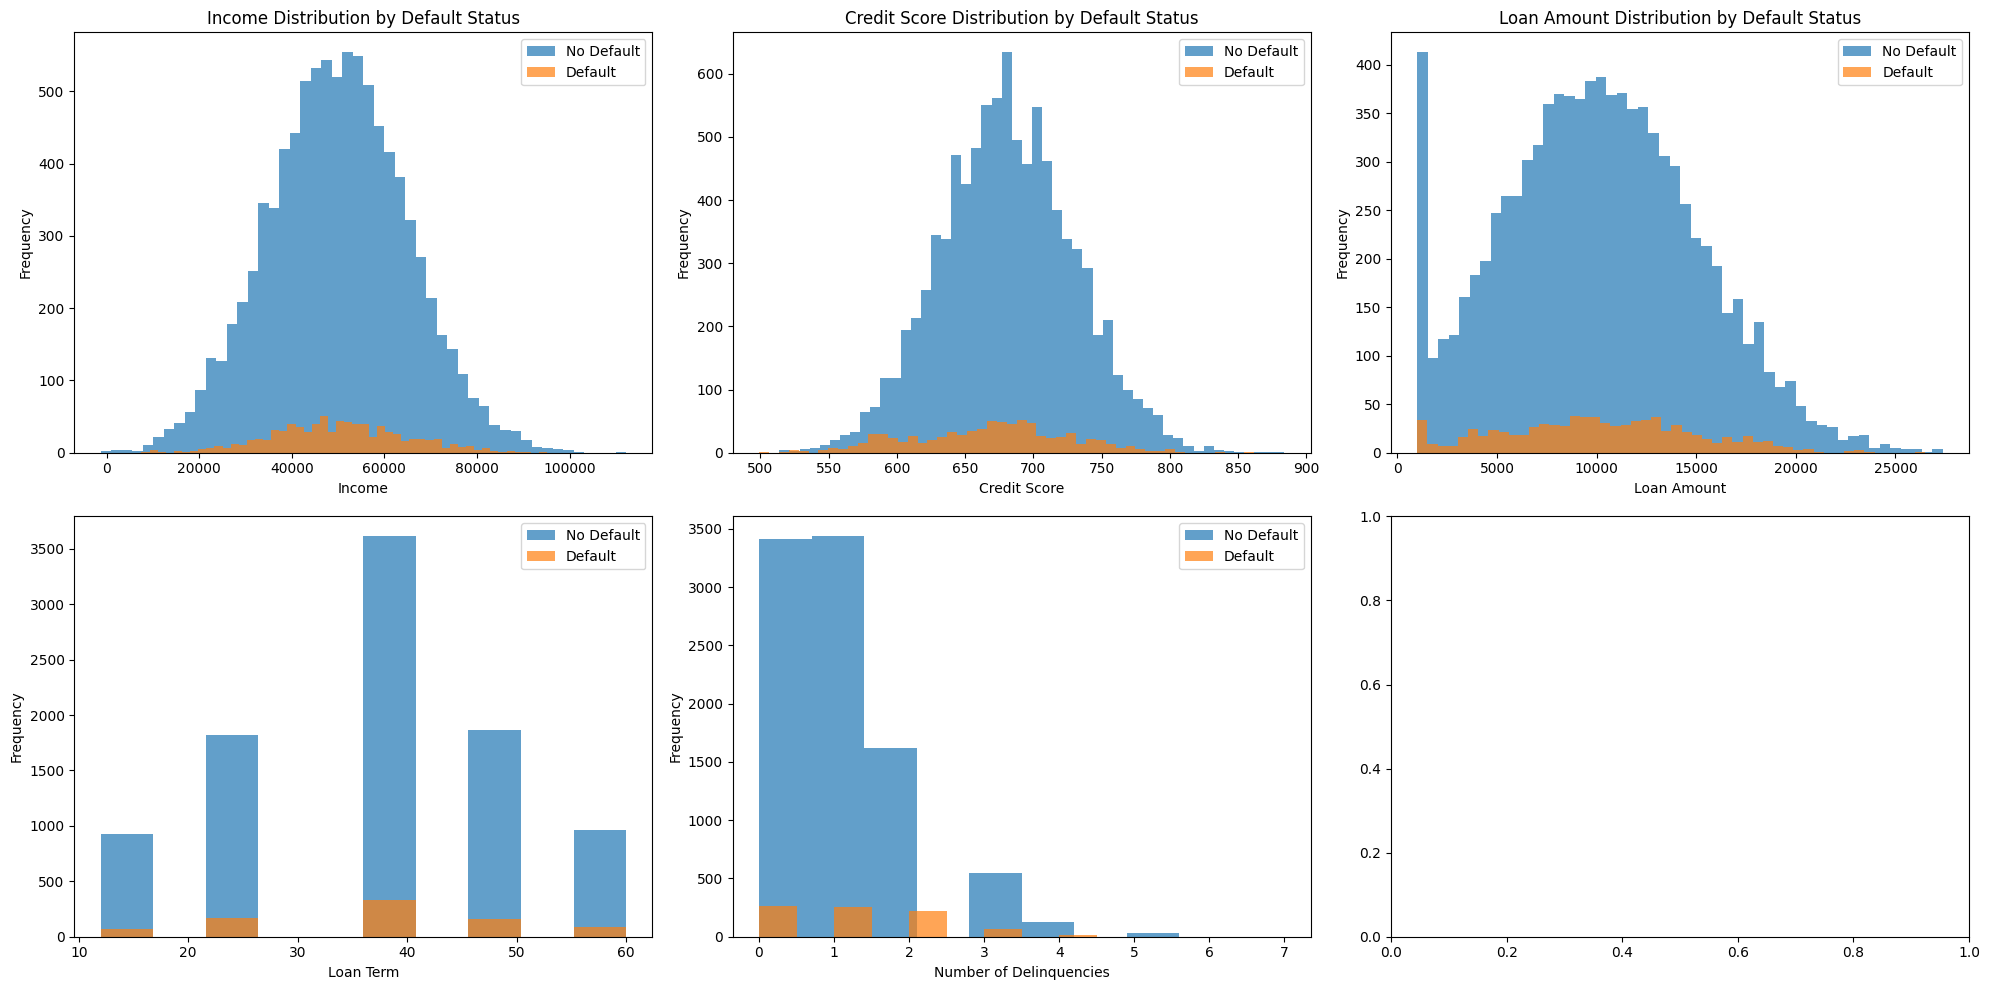

In [62]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
ax1, ax2, ax3, ax4, ax5, ax6 = ax.flatten()

# Income distribution separate by default status
df[df['default'] == 0]['income'].plot(kind='hist', ax=ax1, alpha=0.7, label='No Default', bins=50)
df[df['default'] == 1]['income'].plot(kind='hist', ax=ax1, alpha=0.7, label='Default', bins=50)
ax1.set_title('Income Distribution by Default Status')
ax1.set_xlabel('Income')
ax1.set_ylabel('Frequency')
ax1.legend()

# Credit score distribution by default status
df[df['default'] == 0]['credit_score'].plot(kind='hist', ax=ax2, alpha=0.7, label='No Default', bins=50)
df[df['default'] == 1]['credit_score'].plot(kind='hist', ax=ax2, alpha=0.7, label='Default', bins=50)
ax2.set_title('Credit Score Distribution by Default Status')
ax2.set_xlabel('Credit Score')
ax2.set_ylabel('Frequency')
ax2.legend()

# Age distribution by default status
df[df['default'] == 0]['loan_amount'].plot(kind='hist', ax=ax3, alpha=0.7, label='No Default', bins=50)
df[df['default'] == 1]['loan_amount'].plot(kind='hist', ax=ax3, alpha=0.7, label='Default', bins=50)
ax3.set_title('Loan Amount Distribution by Default Status')
ax3.set_xlabel('Loan Amount')
ax3.set_ylabel('Frequency')
ax3.legend()

# Loan term by default status
df[df['default'] == 0]['loan_term'].plot(kind='hist', ax=ax4, alpha=0.7, label='No Default')
df[df['default'] == 1]['loan_term'].plot(kind='hist', ax=ax4, alpha=0.7, label='Default')
ax4.set_xlabel('Loan Term')
ax4.legend()

# num delinquencies
df[df['default'] == 0]['num_delinquencies'].plot(kind='hist', ax=ax5, alpha=0.7, label='No Default')
df[df['default'] == 1]['num_delinquencies'].plot(kind='hist', ax=ax5, alpha=0.7, label='Default')
ax5.set_xlabel('Number of Delinquencies')
ax5.legend()


plt.tight_layout()
plt.show()

### 3b. Bias Detection

Bias detection - are the approval rate fair across gender?

alternatively, resampling method can measure the imbalance (opt for oversampling/undersampling of one category) to avoid bias toward majority groups

In [63]:
df['gender_approved'] = df['loan_issue_date'].notna() #issued loan

# approval rate
gender_approval_rate = df.groupby('gender')['gender_approved'].mean() * 100
print(f'{gender_approval_rate}')


gender
Female    100.0
Male      100.0
Name: gender_approved, dtype: float64


Text(0, 0.5, 'Approval %')

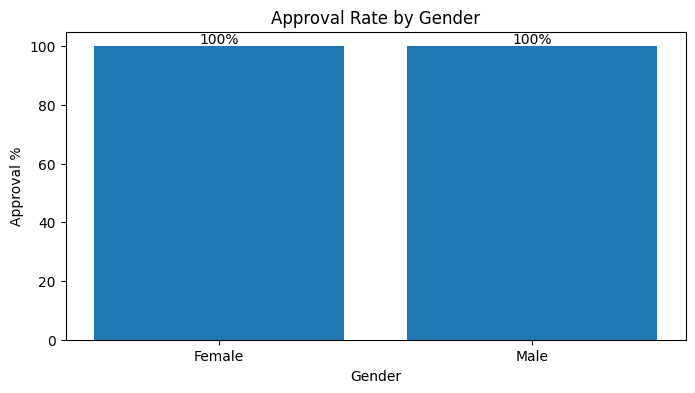

In [64]:
fig, ax = plt.subplots(figsize=(8,4))

bar_value = ax.bar(gender_approval_rate.index, gender_approval_rate.values)
ax.bar_label(bar_value, fmt='%.0f%%')
ax.set_title('Approval Rate by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Approval %')

### 3c. Time Series/ Trends for loans

Loan amount by month per year

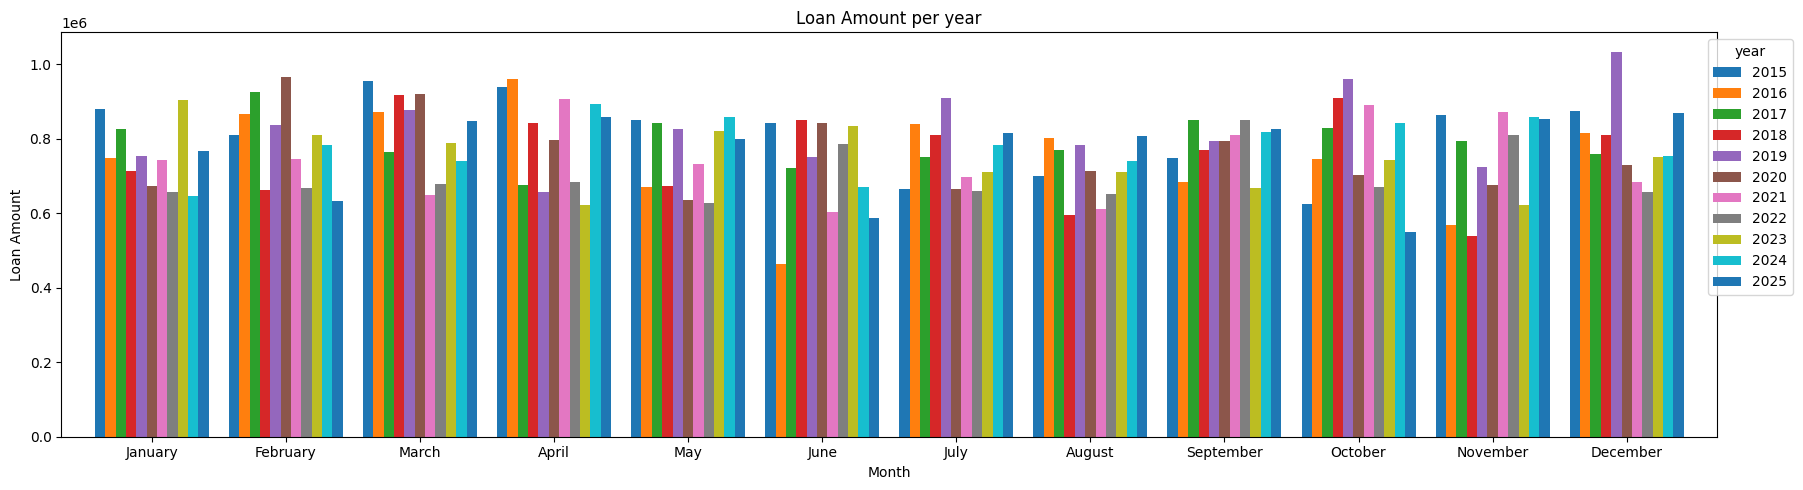

In [65]:
df['month'] = df['loan_issue_date'].dt.month_name()
df['year'] = df['loan_issue_date'].dt.year

# sum total for each month/year
monthly_totals = df.groupby(['year', 'month'])['loan_amount'].sum().reset_index()

months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# ordered categories - useful for sorting
monthly_totals['month'] = pd.Categorical(monthly_totals['month'], categories=months, ordered=True)

# pivot for x and y - plotting
pivot_loan_amount = monthly_totals.pivot(index='month', columns='year', values='loan_amount')

ax = pivot_loan_amount.plot(kind='bar', figsize=(18,5), width=0.85)

plt.xlabel('Month')
plt.ylabel('Loan Amount')
plt.legend(title='year', loc='best', bbox_to_anchor=(1.05, 1))
plt.title("Loan Amount per year")
plt.xticks(rotation=0)
plt.tight_layout()

### 3d. Credit risk trend

Default rate trend: % of loans defaulting by month/year

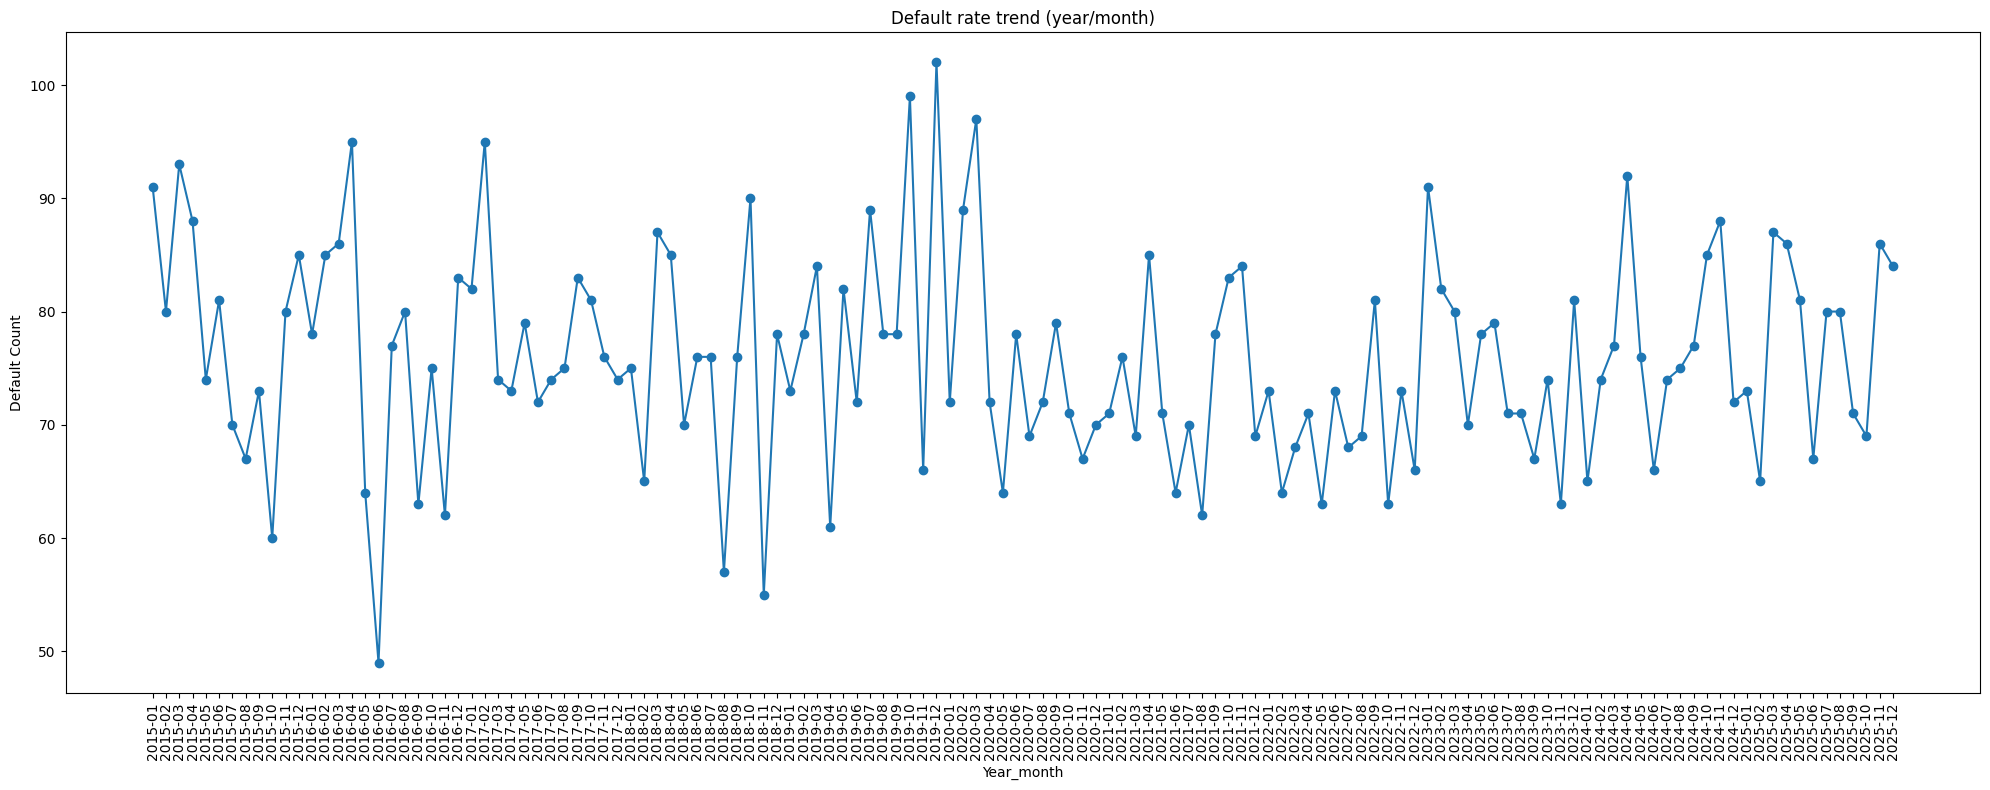

In [66]:
fig, ax = plt.subplots(figsize=(20,8))

df['year_month'] = df['loan_issue_date'].dt.to_period('M')
trend = df.groupby('year_month')['default'].count()

ax.plot(trend.index.astype(str), trend.values, marker='o')
ax.set_title("Default rate trend (year/month)")
ax.set_xlabel('Year_month')
ax.set_ylabel('Default Count')
plt.xticks(rotation=90)
fig.tight_layout()

/var/folders/qv/p7xylylx0sdg17lvn87t9b6h0000gn/T/ipykernel_1901/3735007589.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trend = df.groupby('month')['default'].count()


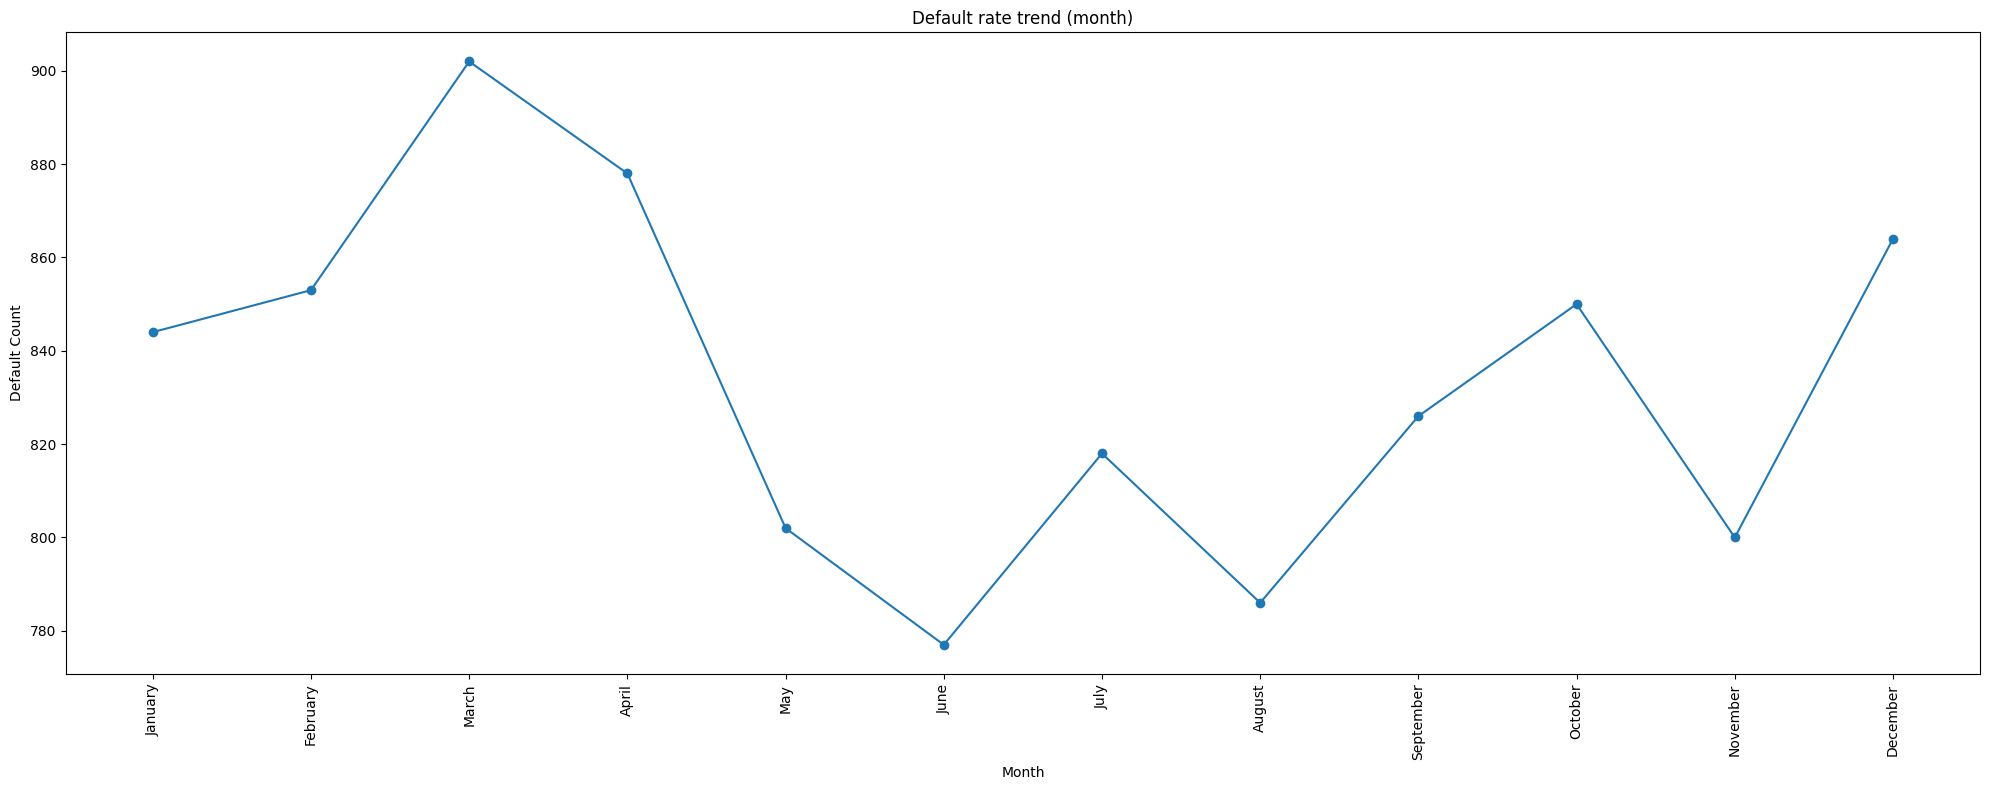

In [67]:
fig, ax = plt.subplots(figsize=(20,8))

df['month'] = pd.Categorical(df['month'], categories=months, ordered=True)
trend = df.groupby('month')['default'].count()
ax.plot(trend.index, trend.values, marker='o')
ax.set_title("Default rate trend (month)")
ax.set_xlabel('Month')
ax.set_ylabel('Default Count')
plt.xticks(rotation=90)
fig.tight_layout()

In [68]:
#average loan amount monthly
average_loan_amt = df.groupby(['month'], as_index=False)['loan_amount'].mean()
average_loan_amt_sorted = average_loan_amt.sort_values(by='loan_amount', ascending=False)
average_loan_amt_sorted

/var/folders/qv/p7xylylx0sdg17lvn87t9b6h0000gn/T/ipykernel_1901/1133954018.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_loan_amt = df.groupby(['month'], as_index=False)['loan_amount'].mean()


,month,loan_amount
8,September,10424.142857
4,May,10396.701995
5,June,10243.319176
10,November,10227.422500
1,February,10211.000000
6,July,10157.332518
11,December,10113.853009
3,April,10063.408884
7,August,10026.737913
2,March,9990.218404


In [69]:
#average loan term monthly
average_loan_term = df.groupby(['month'], as_index=False)['loan_term'].value_counts()
average_loan_term_sorted = average_loan_term.sort_values(by='count', ascending=False)
average_loan_term_sorted

/var/folders/qv/p7xylylx0sdg17lvn87t9b6h0000gn/T/ipykernel_1901/990733509.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_loan_term = df.groupby(['month'], as_index=False)['loan_term'].value_counts()


,month,loan_term,count
10,March,36,354
15,April,36,348
55,December,36,346
45,October,36,337
50,November,36,335
30,July,36,331
0,January,36,326
20,May,36,325
35,August,36,324
5,February,36,313


In [70]:
df

,customer_id,age,gender,income,employment_type,credit_score,loan_amount,loan_term,num_delinquencies,default,loan_issue_date,month,credit_rank,gender_approved,year,year_month
0,C00001,59,Female,37880,Self-employed,624,18486,60,0,0,2015-10-01,October,4,True,2015,2015-10
1,C00002,49,Female,22965,Self-employed,618,4142,60,0,0,2025-06-01,June,4,True,2025,2025-06
2,C00003,35,Female,51856,Salaried,770,9660,60,2,0,2016-04-01,April,2,True,2016,2016-04
3,C00004,63,Male,51565,Salaried,619,19513,36,2,0,2020-05-01,May,4,True,2020,2020-05
4,C00005,28,Male,44771,Unemployed,660,20154,24,0,0,2024-06-01,June,3,True,2024,2024-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,C09996,29,Male,58641,Salaried,712,15500,36,0,0,2016-03-01,March,3,True,2016,2016-03
9996,C09997,37,Male,40758,Salaried,783,7690,36,2,0,2019-11-01,November,2,True,2019,2019-11
9997,C09998,56,Male,78882,Self-employed,749,16465,36,0,0,2016-12-01,December,2,True,2016,2016-12
9998,C09999,37,Female,60081,Unemployed,658,4920,36,1,0,2016-12-01,December,3,True,2016,2016-12


In [71]:
credit_rank_monthly = df.groupby('month', as_index=False)['credit_rank'].value_counts()
credit_rank_monthly_sorted = credit_rank_monthly.sort_values(by='count', ascending=False)
credit_rank_monthly_sorted

/var/folders/qv/p7xylylx0sdg17lvn87t9b6h0000gn/T/ipykernel_1901/640828797.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  credit_rank_monthly = df.groupby('month', as_index=False)['credit_rank'].value_counts()


,month,credit_rank,count
10,March,3,508
5,February,3,474
55,December,3,471
0,January,3,466
40,September,3,458
45,October,3,456
15,April,3,456
30,July,3,448
50,November,3,442
25,June,3,441


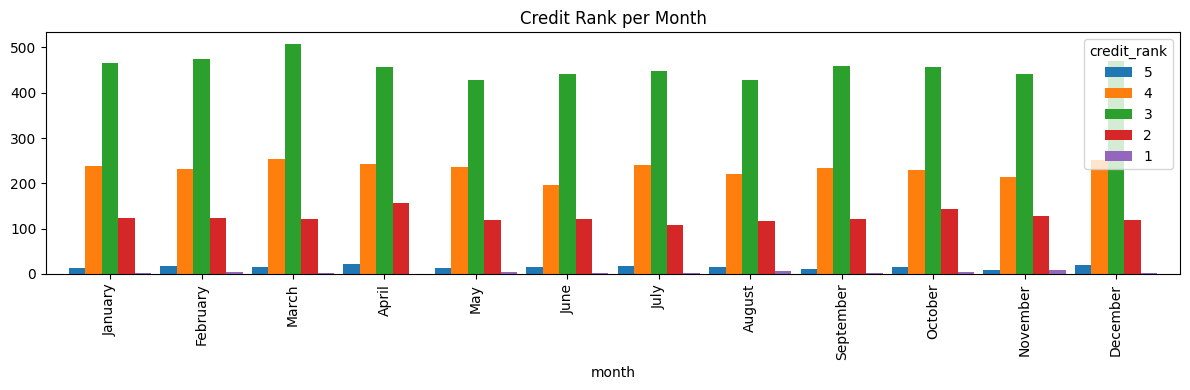

In [72]:
credit_rank_pivot = credit_rank_monthly_sorted.pivot(index='month', columns='credit_rank', values='count')

ax = credit_rank_pivot.plot(kind='bar', figsize=(12,4), width=0.9)
plt.title('Credit Rank per Month')
plt.tight_layout()

In [73]:
#avg value of credit rank for each month
df['credit_rank']=df['credit_rank'].astype(int)
credit_rank_avg = df.groupby('month', as_index=False)['credit_rank'].mean()
credit_rank_avg_sorted = credit_rank_avg.sort_values(by='credit_rank', ascending=False)
credit_rank_avg_sorted

/var/folders/qv/p7xylylx0sdg17lvn87t9b6h0000gn/T/ipykernel_1901/272757722.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  credit_rank_avg = df.groupby('month', as_index=False)['credit_rank'].mean()


,month,credit_rank
6,July,3.196822
11,December,3.195602
2,March,3.174058
4,May,3.169576
0,January,3.165877
8,September,3.157385
1,February,3.157093
7,August,3.155216
3,April,3.144647
5,June,3.131274


In [74]:
employment_monthly = df.groupby('month', as_index=False)['employment_type'].value_counts()
employment_monthly_sorted = employment_monthly.sort_values(by='count', ascending=False)
employment_monthly_sorted

/var/folders/qv/p7xylylx0sdg17lvn87t9b6h0000gn/T/ipykernel_1901/2823267627.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  employment_monthly = df.groupby('month', as_index=False)['employment_type'].value_counts()


,month,employment_type,count
6,March,Salaried,551
9,April,Salaried,533
3,February,Salaried,513
0,January,Salaried,508
33,December,Salaried,506
27,October,Salaried,491
24,September,Salaried,491
18,July,Salaried,489
30,November,Salaried,471
12,May,Salaried,471


In [75]:
income_monthly = df.groupby('month', as_index=False)['income'].mean()
income_monthlyl_sorted = income_monthly.sort_values(by='income', ascending=False)
income_monthlyl_sorted

/var/folders/qv/p7xylylx0sdg17lvn87t9b6h0000gn/T/ipykernel_1901/3504664539.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_monthly = df.groupby('month', as_index=False)['income'].mean()


,month,income
2,March,50711.803769
10,November,50250.518750
9,October,50234.212941
11,December,50225.688657
3,April,49947.525057
4,May,49942.422693
1,February,49906.941383
6,July,49811.760391
0,January,49771.627962
5,June,49726.712999


#### Root Cause Analysis

Identify segment that affect the default rate such as age, income, employement type, credit rank, loan term.

Analysis: 

- High count of short loan term during March
- Average credit ranking for March is the 3rd highest (higher credit rank = worst perform)
- high count of salaried employment during March, but also high on unemployment
- On average, high income during month of March

Default rate by Rank: Higher risk segments should default more

In [76]:
risk_default = df.groupby('credit_rank', as_index=False)['default'].value_counts()
risk_default_sorted= risk_default.sort_values(by='count', ascending=False)
risk_default_sorted

,credit_rank,default,count
4,3,0,5073
6,4,0,2530
2,2,0,1396
5,3,1,404
7,4,1,259
8,5,0,140
3,2,1,109
9,5,1,46
0,1,0,41
1,1,1,2


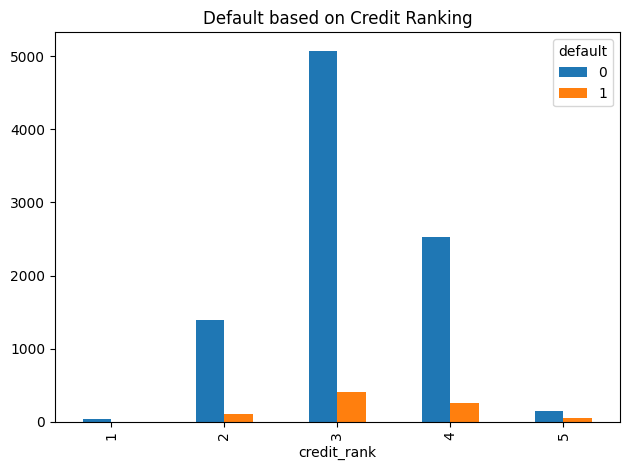

In [77]:
risk_default_pivot = risk_default.pivot(index='credit_rank', columns='default', values='count')

ax = risk_default_pivot.plot(kind='bar')
plt.title('Default based on Credit Ranking')
plt.tight_layout()

Default more frequent with credit ranking of 3 and 4. (Good (3): 670-739 | Fair (4): 580-669)

Delinquencies trend: are borrowers showing more past issue over time?

In [78]:
df

,customer_id,age,gender,income,employment_type,credit_score,loan_amount,loan_term,num_delinquencies,default,loan_issue_date,month,credit_rank,gender_approved,year,year_month
0,C00001,59,Female,37880,Self-employed,624,18486,60,0,0,2015-10-01,October,4,True,2015,2015-10
1,C00002,49,Female,22965,Self-employed,618,4142,60,0,0,2025-06-01,June,4,True,2025,2025-06
2,C00003,35,Female,51856,Salaried,770,9660,60,2,0,2016-04-01,April,2,True,2016,2016-04
3,C00004,63,Male,51565,Salaried,619,19513,36,2,0,2020-05-01,May,4,True,2020,2020-05
4,C00005,28,Male,44771,Unemployed,660,20154,24,0,0,2024-06-01,June,3,True,2024,2024-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,C09996,29,Male,58641,Salaried,712,15500,36,0,0,2016-03-01,March,3,True,2016,2016-03
9996,C09997,37,Male,40758,Salaried,783,7690,36,2,0,2019-11-01,November,2,True,2019,2019-11
9997,C09998,56,Male,78882,Self-employed,749,16465,36,0,0,2016-12-01,December,2,True,2016,2016-12
9998,C09999,37,Female,60081,Unemployed,658,4920,36,1,0,2016-12-01,December,3,True,2016,2016-12


In [79]:
#coding for categorical variables

# binary encoding for gender (1v0)
gender_code = {'Male': 1, 'Female': 0}
df['gender_code'] = df['gender'].map(gender_code)

# one-hot encoding for norminal variable
df = pd.get_dummies(df, columns=['employment_type'])

In [80]:
df

,customer_id,age,gender,income,credit_score,loan_amount,loan_term,num_delinquencies,default,loan_issue_date,month,credit_rank,gender_approved,year,year_month,gender_code,employment_type_Salaried,employment_type_Self-employed,employment_type_Unemployed
0,C00001,59,Female,37880,624,18486,60,0,0,2015-10-01,October,4,True,2015,2015-10,0,False,True,False
1,C00002,49,Female,22965,618,4142,60,0,0,2025-06-01,June,4,True,2025,2025-06,0,False,True,False
2,C00003,35,Female,51856,770,9660,60,2,0,2016-04-01,April,2,True,2016,2016-04,0,True,False,False
3,C00004,63,Male,51565,619,19513,36,2,0,2020-05-01,May,4,True,2020,2020-05,1,True,False,False
4,C00005,28,Male,44771,660,20154,24,0,0,2024-06-01,June,3,True,2024,2024-06,1,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,C09996,29,Male,58641,712,15500,36,0,0,2016-03-01,March,3,True,2016,2016-03,1,True,False,False
9996,C09997,37,Male,40758,783,7690,36,2,0,2019-11-01,November,2,True,2019,2019-11,1,True,False,False
9997,C09998,56,Male,78882,749,16465,36,0,0,2016-12-01,December,2,True,2016,2016-12,1,False,True,False
9998,C09999,37,Female,60081,658,4920,36,1,0,2016-12-01,December,3,True,2016,2016-12,0,False,False,True


In [81]:
selected_features = ['age', 'gender_code', 'income', 'credit_score', 'loan_amount', 'loan_term', 'num_delinquencies',
                     'employment_type_Salaried', 'employment_type_Self-employed', 'employment_type_Unemployed', 'default']

correlation = df[selected_features].corr()
correlation

,age,gender_code,income,credit_score,loan_amount,loan_term,num_delinquencies,employment_type_Salaried,employment_type_Self-employed,employment_type_Unemployed,default
age,1.000000,-0.011418,0.002170,-0.003638,-0.023485,0.002109,0.018410,0.007335,-0.005881,-0.002987,0.004664
gender_code,-0.011418,1.000000,-0.004667,0.002268,0.000561,-0.012941,-0.004939,-0.009382,0.000447,0.014761,0.000299
income,0.002170,-0.004667,1.000000,-0.003454,-0.012017,-0.002915,0.004026,0.005280,0.000201,-0.009007,0.008383
credit_score,-0.003638,0.002268,-0.003454,1.000000,0.005164,0.014389,0.010600,-0.004598,0.001924,0.004597,-0.073316
loan_amount,-0.023485,0.000561,-0.012017,0.005164,1.000000,0.005799,-0.001243,0.005071,-0.007416,0.003115,0.001820
loan_term,0.002109,-0.012941,-0.002915,0.014389,0.005799,1.000000,-0.011927,0.022223,-0.025735,0.003193,0.001904
num_delinquencies,0.018410,-0.004939,0.004026,0.010600,-0.001243,-0.011927,1.000000,0.007329,-0.010269,0.003809,0.055042
employment_type_Salaried,0.007335,-0.009382,0.005280,-0.004598,0.005071,0.022223,0.007329,1.000000,-0.805658,-0.401150,-0.041137
employment_type_Self-employed,-0.005881,0.000447,0.000201,0.001924,-0.007416,-0.025735,-0.010269,-0.805658,1.000000,-0.219439,-0.027557
employment_type_Unemployed,-0.002987,0.014761,-0.009007,0.004597,0.003115,0.003193,0.003809,-0.401150,-0.219439,1.000000,0.110363


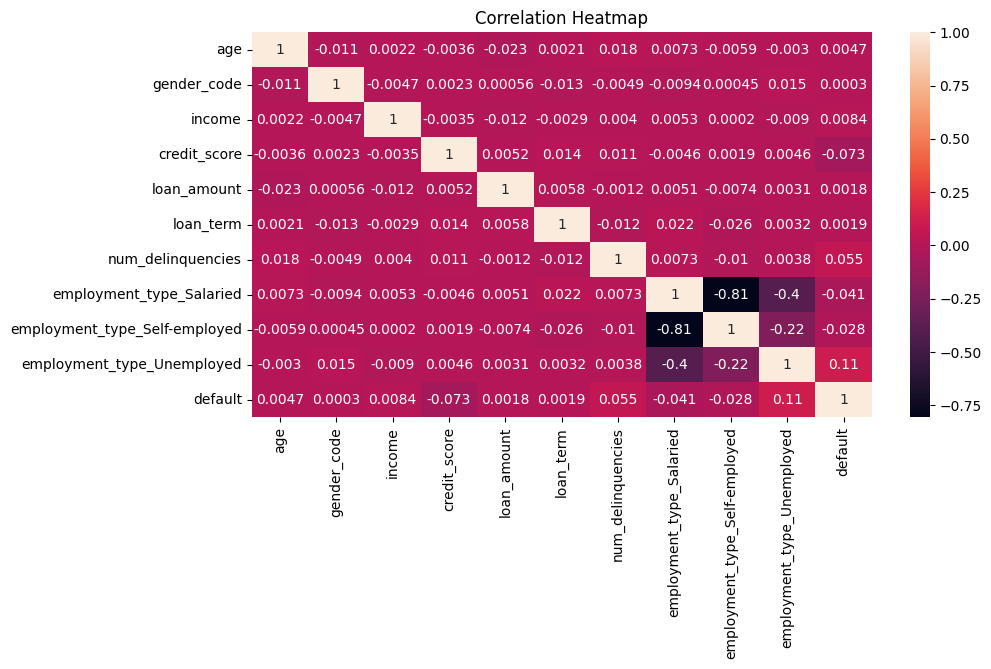

In [82]:
#visual for correlation heatmap
plt.figure(figsize=(10,5))
sn.heatmap(correlation, annot=True)
plt.title("Correlation Heatmap")
plt.show()

- negative correlation between Salaried and Self- employed indicate that Salaried person cannot belong with Self-employed at the same time. Same goes for Unemployed and Salaried or Self-employed. A person cannot be self-employed and unemployed at the same time. Therefore, we can eliminate one variable from the correlation matrix.

- use drop_first=True when using one-hot encoding (dummy encoding) to reduce redundancy

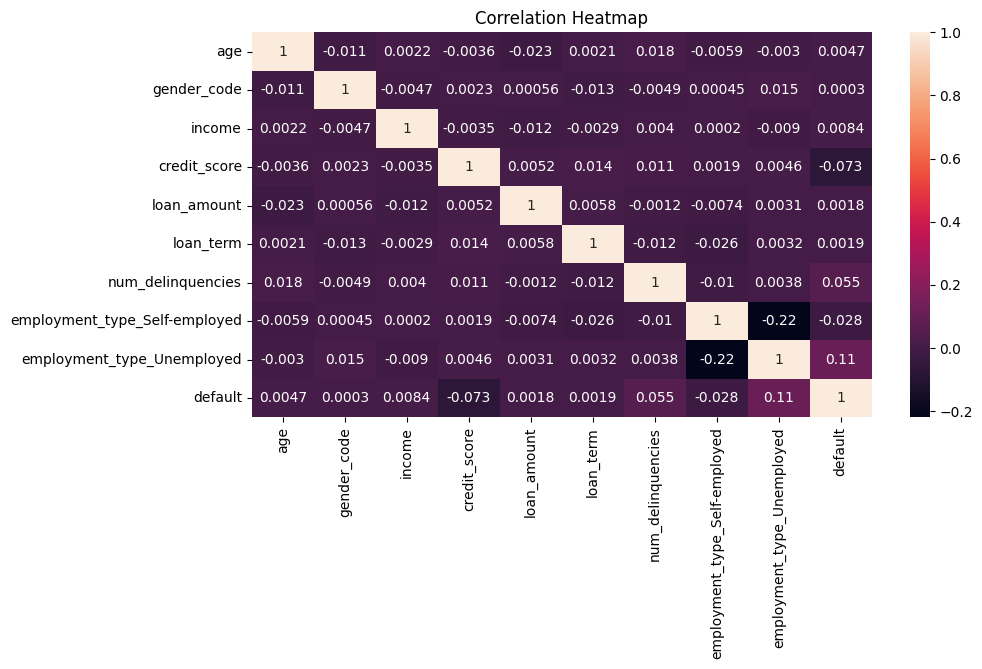

In [83]:
selected_features = ['age', 'gender_code', 'income', 'credit_score', 'loan_amount', 'loan_term', 'num_delinquencies',
                     'employment_type_Self-employed', 'employment_type_Unemployed', 'default']

correlation = df[selected_features].corr()

#visual for correlation heatmap
plt.figure(figsize=(10,5))
sn.heatmap(correlation, annot=True)
plt.title("Correlation Heatmap")
plt.show()


Heatmap correlation notable interpretation:
- negative relationship between credit score and default (higher credit = low default)
- positive relationship between unemployement and default (high unemployment = high default)
- positive relationship between delinquencies and default (high delinquency = high default)

## 4. Modeling Analysis

forecasting using statistical model such as ARIMA


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Text(0.5, 1.0, 'Monthly Approval Count')

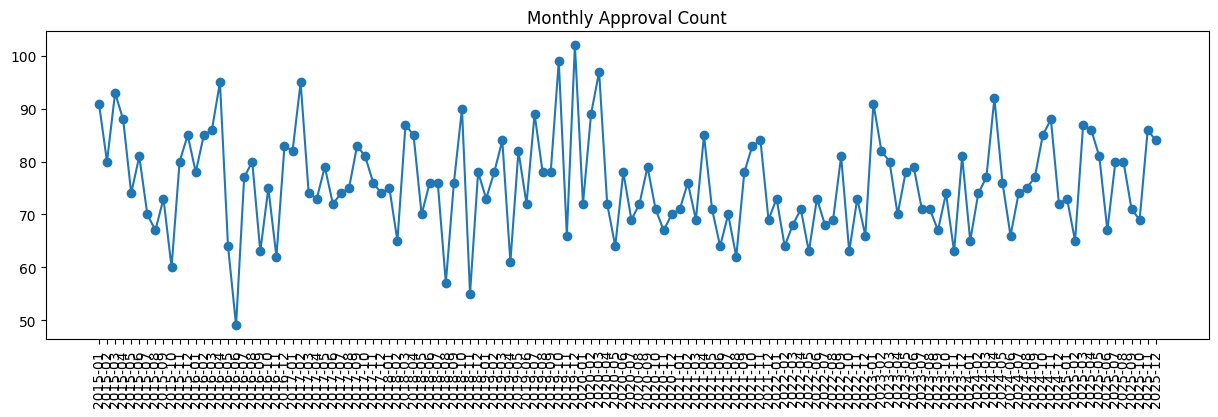

In [84]:
# Install pmdarima if not already installed
%pip install pmdarima

#overall monthly approval
monthly_approval = df.groupby('year_month')['customer_id'].count()

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima 

# 1. plot figure to show trends
plt.figure(figsize=(15,4))
plt.plot(monthly_approval.index.astype(str), monthly_approval.values, marker='o')
plt.xticks(rotation=90)
plt.title('Monthly Approval Count')


In [85]:
#2. check stationary (mean and variance over time) - use adf test
adf = adfuller(monthly_approval)
print(f'ADF Result: {adf[0]}')
print(f'p-value: {adf[1]}') #if p-value > 0.05, series is non-stationary

ADF Result: -11.081729264710885
p-value: 4.294517696339366e-20


- p-value is > 0.05 meaning series is non-stationary (mean and variance changed over time) -> difference needed (capture underlining pattern)
- p-value < 0.05 then it is stationary, can be use for ARIMA

In [86]:
# #first -order differencing
# ts_diff = monthly_approval.diff().dropna()

In [87]:
# plt.figure(figsize=(12,6))
# plt.plot(monthly_approval.index.astype(str), monthly_approval.values, marker='o', label='Original')
# plt.plot(ts_diff.index.astype(str), ts_diff.values, marker='x', label='Diff', color='orange')
# plt.title('Original vs. Differenced Monthly Loan Approvals')
# plt.legend()

In [88]:
# #evaluating the diff
# adf_diff = adfuller(ts_diff)
# print(f'ADF Result: {adf_diff[0]}')
# print(f'p-value: {adf_diff[1]}') 

p-value is < 0.05, meaning it is stationary and can be use for ARIMA

#### ARIMA

In [89]:
#3. ARIMA modeling
arima_model = auto_arima(monthly_approval, 
                         start_p=1, start_q=1,
                         max_p=5, max_q=5,
                         d=None, 
                         m=12, #monthly seasonality
                         seasonal=True, #allow seasonal ARIMA
                         trace=True,
                         error_action='ignore', suppress_warnings=True, stepwise=True)
print(arima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=974.059, Time=0.54 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=967.319, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=970.976, Time=0.15 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=970.988, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1521.044, Time=0.00 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=969.093, Time=0.08 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=969.095, Time=0.03 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=971.094, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=969.182, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=969.196, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=971.160, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 1.111 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                

- AIC/BIC : the lower the better (mainly use for comparing models)
- Intercept: 75.7 (~76) - on average, about 76 approvals per month
- sigma2 86.48 : variance of residual; since its significant, there are some random noise in the data. 
- Q = 0.14, Prob(Q) = 0.71 → High p-value → ✅ residuals are uncorrelated. Good.
- JB = 0.99, Prob(JB) = 0.61 → Fail to reject normality. ✅ Residuals look normally distributed.
- H = 0.63, Prob(H) = 0.13 → No strong evidence of changing variance. ✅ Good.
- Skew = 0.20, Kurtosis = 3.14
    - Skew ~ 0 → fairly symmetric residuals.
    - Kurtosis ~ 3 → close to normal distribution.

In [90]:
best_order = arima_model.order
best_order

(0, 0, 0)

best order of 0 meaning that the values are stationary

In [91]:
#fit the model based on best order
best_model = SARIMAX(monthly_approval, order=best_order)
arima_results = best_model.fit(disp=0)
print(arima_results)

In [92]:
#forecasting future values
forecast = arima_results.get_forecast(steps=12)

#predict values
y_pred = forecast.predicted_mean

#confidence intervals
conf_int = forecast.conf_int()


In [93]:
y_pred

2026-01    0.0
2026-02    0.0
2026-03    0.0
2026-04    0.0
2026-05    0.0
2026-06    0.0
2026-07    0.0
2026-08    0.0
2026-09    0.0
2026-10    0.0
2026-11    0.0
2026-12    0.0
Freq: M, Name: predicted_mean, dtype: float64

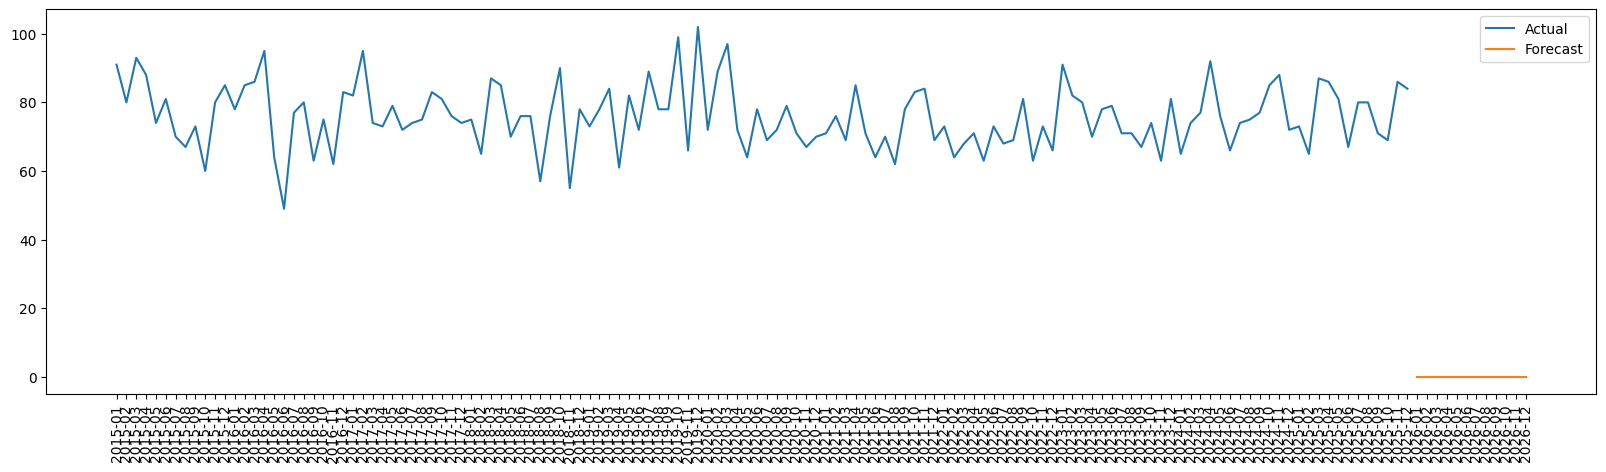

In [94]:
#plot actual vs forecast
plt.figure(figsize=(20,5))
plt.plot(monthly_approval.index.astype(str), monthly_approval.values, label='Actual')
plt.plot(y_pred.index.astype(str), y_pred, label='Forecast')
plt.xticks(rotation=90)
plt.legend()

flat line indicate that there is no strong trend or drift in the data (stationary). = ARIMA sees no pattern to model.

#### SARIMA

In [ ]:
sarima_model = SARIMAX(monthly_approval,
                       order=(1,1,1),
                       seasonal_order=(1,1,1,12),
                       enforce_stationarity=False,
                       enforce_invertibility=False
                       )
# fit model
sarima_fit = sarima_model.fit(disp=False)

# forecast
sarima_forecast = sarima_fit.get_forecast(steps=24)
sarima_forecast_mean = sarima_forecast.predicted_mean
sarima_forecast_ci = sarima_forecast.conf_int()

# view the predicted mean for next 24 months
sarima_forecast_mean

2026-01    76.754281
2026-02    78.822763
2026-03    83.244213
2026-04    81.070477
2026-05    74.175276
2026-06    71.934055
2026-07    75.672623
2026-08    72.777769
2026-09    76.444454
2026-10    78.642447
2026-11    74.055600
2026-12    79.881852
2027-01    76.782835
2027-02    78.813638
2027-03    83.258446
2027-04    81.086259
2027-05    74.193561
2027-06    71.936811
2027-07    75.687610
2027-08    72.796579
2027-09    76.446536
2027-10    78.638985
2027-11    74.080645
2027-12    79.896562
Freq: M, Name: predicted_mean, dtype: float64

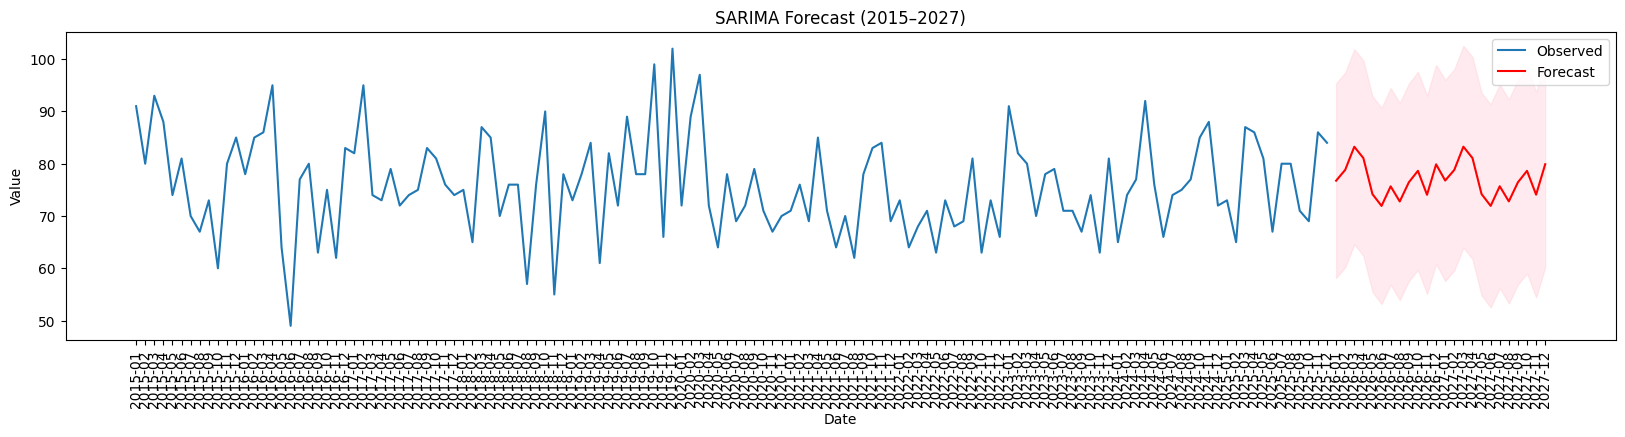

In [132]:
plt.figure(figsize=(20,4))
plt.plot(monthly_approval.index.astype(str), monthly_approval.values, label='Observed')
plt.plot(sarima_forecast_mean.index.astype(str), sarima_forecast_mean, label='Forecast', color='red')

# Confidence interval shading
plt.fill_between(sarima_forecast_ci.index.astype(str),
                 sarima_forecast_ci.iloc[:, 0],
                 sarima_forecast_ci.iloc[:, 1],
                 color='pink', alpha=0.3)

plt.title('SARIMA Forecast (2015–2027)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## 5. Segmentation and clustering

1. Cluster borrowers based on income, credit score, loan size
2. Profile each segment to determine: who is risky, who is profitable to aim for marketing

## 6. Anomaly Detection

1. Unusual high loans for low-income
2. Unusual combinations of features